In [2]:
import numpy as np
import matplotlib.pyplot as plt

First, define $f(x) = x \tanh x$ and $g(x) = \frac {x^2}{1+x}$

In [3]:
def f(x):
    return x * np.tanh(x)
def g(x):
    return x**2/(1+x)

Plot the result

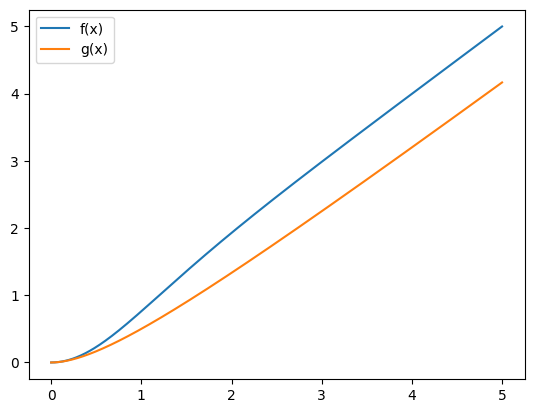

In [16]:
#Create an array for the x value
xarr = np.linspace(0,5,500)

plot = plt.subplot(1, 1, 1)
plot.plot(xarr, f(xarr), label = 'f(x)')
plot.plot(xarr, g(xarr), label = 'g(x)' )
plot.legend()

Use SciPy to solve for a root

In [17]:
from scipy.optimize import fsolve

In [20]:
h = lambda x: f(x) - g(x) - 0.5

fsolve(h, [0, 5])

array([1.63247236, 1.63247236])

For the third part, we are going to solve the second order differential equation $\ddot{x} + x^2 = t^2$ with ODEINT. We can deal with this by let $y = \dot x$. The second order become two first order DEs, $\dot{y} = t^2 - x^2$ and $\dot x = y$

In [21]:
from scipy.integrate import odeint

In [33]:
def model(z,t):
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = t**2 - x**2
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0.5]

# time points
tneg = np.linspace(0,-10,200)
tpos = np.linspace(0,10,200)
# store solution

zneg = odeint(model,z0,tneg)
zpos = odeint(model,z0,tpos)


In [45]:
xneg = np.zeros(200)
xpos = np.zeros(200)
yneg = np.zeros(200)
ypos = np.zeros(200)
for i in range(200):
    xneg[i] = zneg[i][0]
    xpos[i] = zpos[i][0]
    yneg[i] = zneg[i][1]
    ypos[i] = zpos[i][1]
t = np.append(np.flip(tneg), tpos)
x = np.append(np.flip(xneg), xpos)
y = np.append(np.flip(yneg), ypos)

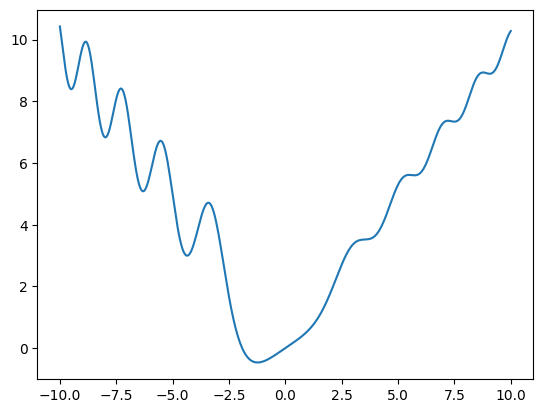

In [47]:
plt.plot(t,x)
#plt.plot(t,y)